<img src="../img/logвtipo com cores oficiais.png" style="background-color:white;">

# Evasive PDF Samples
Project developed in the Artifial Intelligence course unit, in the second semester of the third year of the Bachelor's in Informatics and Computing Enginnering at FEUP.

Pedro Gomes, up202108825
<br>
Simão Rodrigues, up202005700

## Description
This project focuses on enhancing malware detection in PDF files by addressing evasion attacks, which are attempts to bypass existing detection mechanisms.

The dataset used consists of evasive PDF samples, labeled as either malicious (1) or benign (0).

By using machine learning algorithms, this project's main objective is to develop a malware detector in PDF files, capable of resisting evasion attacks.
We'll also test the results with other detectors, and evaluate the robustness of each algorithm in comparison with ours.

## References
1. https://www.kaggle.com/datasets/fouadtrad2/evasive-pdf-samples<br>
This is where the dataset was downloaded from, and from which the initial understanding of the project was obtained, as well as the description of the dataset's columns.
2. https://doi.org/10.3390/app13063472 - *Trad, F.; Hussein, A.; Chehab, A. Leveraging Adversarial Samples for Enhanced Classification of Malicious and Evasive PDF Files. Appl. Sci. 2023, 13, 3472.<br>*
This is the paper cited by the reference above. It provides a thorough study of the problem and information about the different approaches that can be taken.

## Importing Libraries

The libraries used in this project need to be installed before running it (You'll need python and pip installed beforehand).

To do so, run <code>pip install -r requirements.txt</code> in the project's root directory:

These are then imported into the project in the following code block:

In [1]:
# import everything

import pandas as pd

## Create the dataframe, using pandas

For this, we need to read the CSV file that was given to us in the project's example dataset.

In [2]:
# read the file and store it in the 'data' variable
data = pd.read_csv('../data/data.csv')

# output the header and the first 3 rows
# we're not using print() because the output in jupyter can be done without it - and it's prettier!
data.head(3)

,pdfsize,pages,title characters,images,obj,endobj,stream,endstream,xref,trailer,...,ObjStm,JS,OBS_JS,Javascript,OBS_Javascript,OpenAction,OBS_OpenAction,Acroform,OBS_Acroform,class
0,644.326,70,0,1,348,351,128,128,1,1,...,0,1,0,1,0,1,0,1,0,1
1,648.050,68,0,1,348,345,124,124,1,1,...,0,1,0,1,0,0,0,1,0,1
2,696.506,68,0,1,353,353,128,125,1,1,...,0,1,0,1,0,0,0,1,0,1


## Dataset comprehension

This dataset contains 21 columns, which can be seen in the Python code block below.
Here's a description of them:
* <u>**pdfsize**</u> - Size of the PDF file in megabytes (MB).
* <u>**pages**</u> - Number of pages in the document.
* <u>**title characters</u>** - Total number of characters in the document's title.
* <u>**images**</u> - Number of images embedded within the document
* <u>**obj**</u> - Number of keywords /obj
* <u>**endobj**</u> - Number of keywords /endobj
* <u>**stream**</u> - Number of keywords /stream
* <u>**endstream**</u> - Number of keywords /endstream
* <u>**xref**</u> - Number of xref tables
* <u>**trailer**</u> - Number of keywords /trailer
* <u>**startxref**</u> - Number of keywords /startxref
* <u>**ObjStm**</u> - Number of keywords /Objstm (Object streams)
* <u>**JS**</u> - Number of keywords /JS
* <u>**OBS_JS**</u> - Number of keywords /JS (obfuscated)
* <u>**Javascript**</u> - Number of keywords /Javascript
* <u>**OBS_Javascript**</u> - Number of keywords /Javascript (obfuscated)
* <u>**OpenAction**</u> - Number of keywords /OpenAction
* <u>**OBS_OpenAction**</u> - Number of keywords /OpenAction (obfuscated)
* <u>**Acroform**</u> - Number of keywords /Acroform
* <u>**OBS_Acroform**</u> - Number of keywords /Acroform (obfuscated)
* <u>**class**</u> - Binary classification of the PDF file - Benign (0) or malicious (1)

In [3]:
# print the number of columns
print(f'{len(data.columns)} columns')

# output the header and transpose it so that it's not collapsed
data.head(0).transpose()

21 columns


""
pdfsize
pages
title characters
images
obj
endobj
stream
endstream
xref
trailer


## Exploratory Data Analysis (EDA)

Quick look at data characteristics and patterns.

In [4]:
# Summarizes data points
data.describe()

,pdfsize,pages,title characters,images,obj,endobj,stream,endstream,xref,trailer,...,ObjStm,JS,OBS_JS,Javascript,OBS_Javascript,OpenAction,OBS_OpenAction,Acroform,OBS_Acroform,class
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,500000.0,500000.000000,500000.0,500000.000000,500000.0,500000.000000,500000.0,500000.0
mean,563.363772,55.101686,5.617004,1.041594,273.595072,273.472290,95.115512,95.331500,0.969714,1.001358,...,0.008572,0.873134,0.0,0.795662,0.0,0.436600,0.0,0.887564,0.0,0.9
std,280.213763,30.233062,6.501397,0.734654,142.333280,142.734185,51.683914,52.094421,0.263349,0.244811,...,0.198168,0.547981,0.0,0.416932,0.0,0.495965,0.0,0.519314,0.0,0.3
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
25%,585.864250,67.000000,0.000000,1.000000,266.000000,266.000000,85.000000,87.000000,1.000000,1.000000,...,0.000000,1.000000,0.0,1.000000,0.0,0.000000,0.0,1.000000,0.0,1.0
50%,657.841000,68.000000,4.000000,1.000000,346.000000,345.000000,123.000000,122.000000,1.000000,1.000000,...,0.000000,1.000000,0.0,1.000000,0.0,0.000000,0.0,1.000000,0.0,1.0
75%,708.503250,69.000000,9.000000,2.000000,355.000000,354.000000,126.000000,126.000000,1.000000,1.000000,...,0.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.0
max,1761.042000,287.000000,267.000000,18.000000,760.000000,760.000000,254.000000,254.000000,3.000000,3.000000,...,15.000000,3.000000,0.0,5.000000,0.0,1.000000,0.0,2.000000,0.0,1.0


In [5]:
# Checks for any missing data in columns.
data.isnull().sum()

pdfsize             0
pages               0
title characters    0
images              0
obj                 0
endobj              0
stream              0
endstream           0
xref                0
trailer             0
startxref           0
ObjStm              0
JS                  0
OBS_JS              0
Javascript          0
OBS_Javascript      0
OpenAction          0
OBS_OpenAction      0
Acroform            0
OBS_Acroform        0
class               0
dtype: int64

C:\Users\qrodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


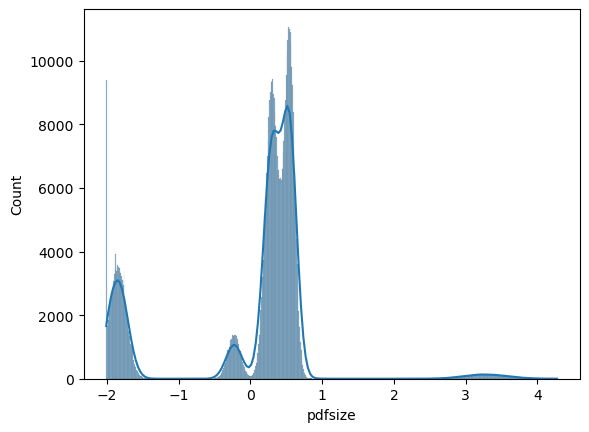

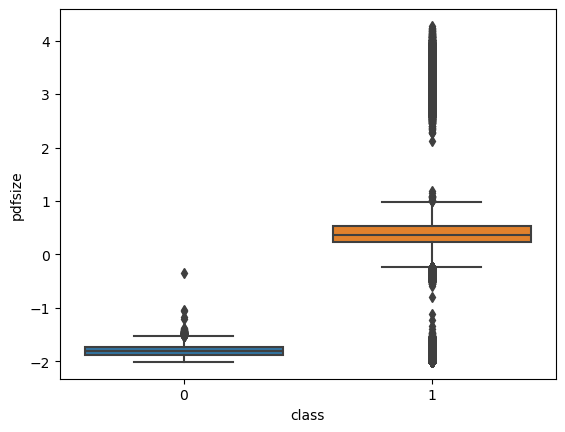

In [14]:
# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of 'pdfsize'.
sns.histplot(data['pdfsize'], kde=True)
plt.show()

# Compare 'pdfsize' across different 'class' values.
sns.boxplot(x='class', y='pdfsize', data=data)
plt.show()

## Data Normalization

Normalize features to ensure consistent scale across dimensions for model training.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Define features to scale, excluding the target 'class'
features = data.columns.drop('class')
data[features] = scaler.fit_transform(data[features])

data.head()

,pdfsize,pages,title characters,images,obj,endobj,stream,endstream,xref,trailer,...,ObjStm,JS,OBS_JS,Javascript,OBS_Javascript,OpenAction,OBS_OpenAction,Acroform,OBS_Acroform,class
0,0.288931,0.492783,-0.863970,-0.056617,0.522752,0.543162,0.636262,0.627102,0.115003,-0.005547,...,-0.043256,0.231515,0.0,0.4901,0.0,1.135969,0.0,0.216509,0.0,1
1,0.302220,0.426630,-0.863970,-0.056617,0.522752,0.501126,0.558869,0.550319,0.115003,-0.005547,...,-0.043256,0.231515,0.0,0.4901,0.0,-0.880306,0.0,0.216509,0.0,1
2,0.475146,0.426630,-0.863970,-0.056617,0.557881,0.557174,0.636262,0.569515,0.115003,-0.005547,...,-0.043256,0.231515,0.0,0.4901,0.0,-0.880306,0.0,0.216509,0.0,1
3,0.544450,0.426630,-0.863970,-1.417803,3.410344,2.757070,2.996767,1.855642,0.115003,-0.005547,...,-0.043256,0.231515,0.0,0.4901,0.0,1.135969,0.0,0.216509,0.0,1
4,0.512960,0.492783,0.674163,1.304569,0.803783,0.697295,0.887791,0.819062,0.115003,-0.005547,...,-0.043256,0.231515,0.0,0.4901,0.0,1.135969,0.0,0.216509,0.0,1


## Data Splitting

Split the dataset into training and test sets to prepare for model validation.

In [15]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop('class', axis=1)
y = data['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the train and test sets.
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (400000, 20)
Test set shape: (100000, 20)


## Tools used

Python: For all back-end algorithms and data manipulation.

Scikit-Learn: Machine learning library for implementing various classification algorithms and data pre-processing.

Pandas: Data structures and data analysis tools for reading and manipulating data.

NumPy: Numerical computing with support for large, multi-dimensional arrays and matrices.

Matplotlib/Seaborn: Plotting libraries for visualizing the dataset and results.

Jupyter Notebook / DataSpell: Interactive computing environments where the project is being developed and documented.

## Approach

Data Acquisition: The dataset comprising evasive PDF samples was sourced and loaded for analysis.

Exploratory Data Analysis (EDA): Conducted an initial exploration to understand data characteristics, including the distribution of features and checking for missing values.

Data Preprocessing: Normalized data using StandardScaler to ensure feature scaling and variance homogeneity.

Data Splitting: Segregated the dataset into training (80%) and test (20%) sets to prepare for unbiased model evaluation.